In [1]:
import gdsfactory as gf

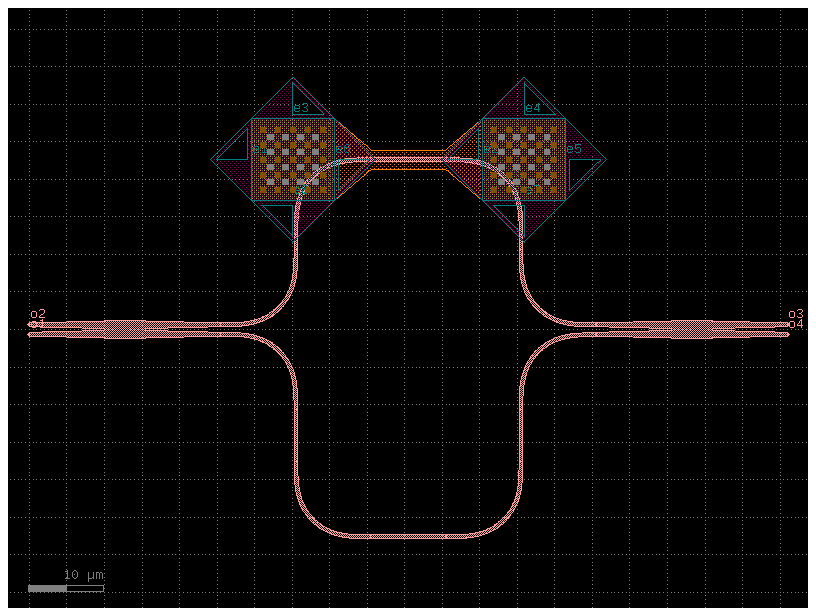

In [2]:
c = gf.components.mzi2x2_2x2_phase_shifter(delta_length=10, length_y=2, length_x=10, bend='bend_euler', straight='straight', straight_x_top='straight_heater_metal', splitter='mmi2x2', combiner='mmi2x2', with_splitter=True, port_e1_splitter='o3', port_e0_splitter='o4', port_e1_combiner='o3', port_e0_combiner='o4', port1='o1', port2='o2', nbends=2, cross_section='strip', mirror_bot=False, add_optical_ports_arms=False, min_length=0.01, auto_rename_ports=True).copy()

c.draw_ports()

c.plot()

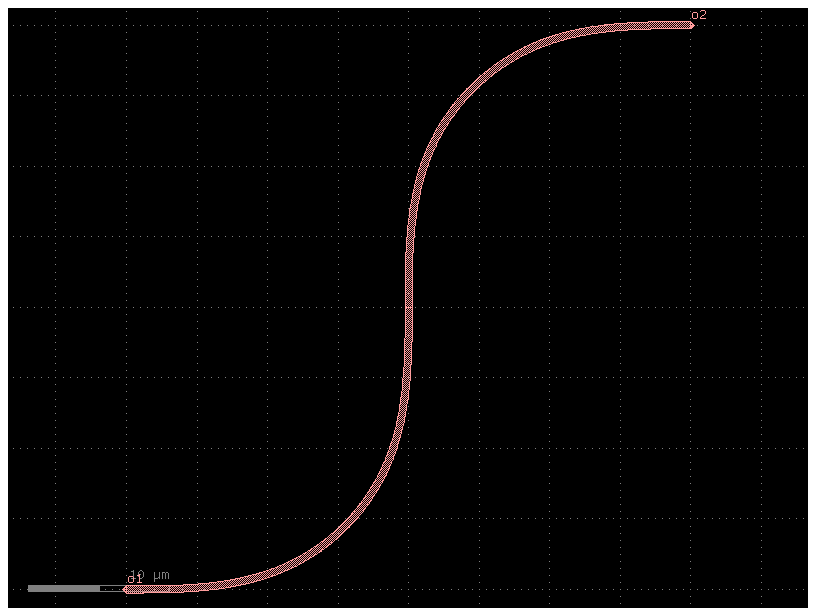

In [3]:
d = gf.components.bend_euler_s(radius=20,p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

d.draw_ports()

d.plot()

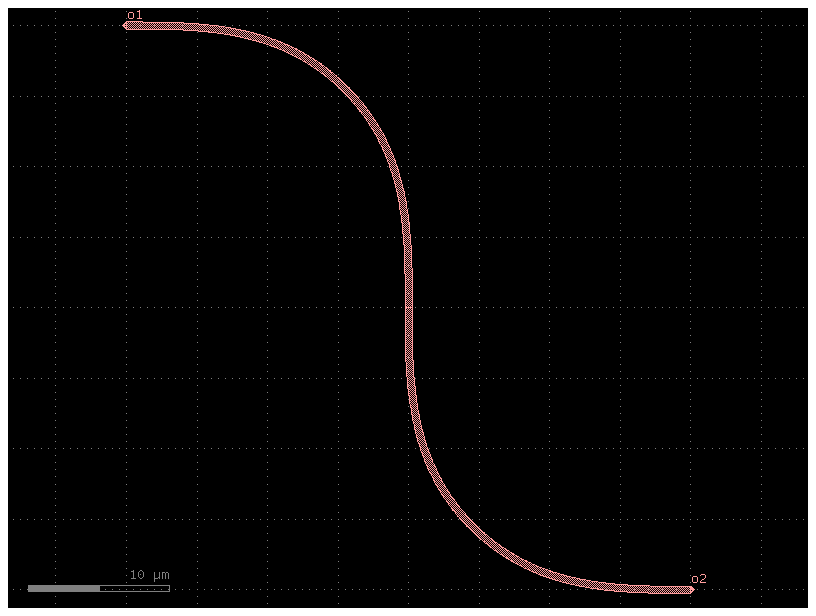

In [4]:
dmir = gf.components.bend_euler_s(radius=20, p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

dmir.mirror_y()

dmir.draw_ports()

dmir.plot()

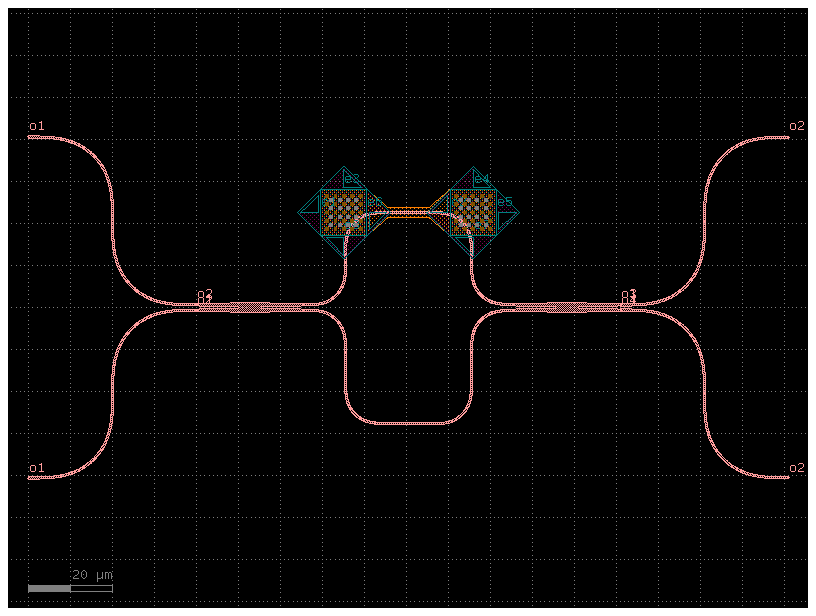

In [5]:
cc = gf.Component()

mzi = cc << c
mzi2 = cc << c

bends1 = cc << d
bends2 = cc << dmir
bends3 = cc << d
bends4 = cc << dmir

bends1.connect("o2", mzi.ports["o1"])
bends2.connect("o2", mzi.ports["o2"], mirror=True)
bends3.connect("o1", mzi.ports["o3"])
bends4.connect("o1", mzi.ports["o4"], mirror=True)

cc.plot()